# Google Playstore

## Load in Dataset

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

nRowsRead = None
df = pd.read_csv('data/Google-Playstore.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'Google-Playstore-32K.csv'

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


## Cleaning

### Remove irrelevant columns

In [2]:
df = df.drop(['App Id', 'Currency', 'Developer Website', 'Developer Email', 'Privacy Policy', 'Size', 'Price'], axis=1)

### Combine duplicate categories

In [3]:
# Collapse 'Music' and 'Music & Audio' into 'Music'
#df['Category'] = df['Category'].str.replace('Music & Audio', 'Music')

# Collapse 'Educational' and 'Education' into 'Education'
#df['Category'] = df['Category'].str.replace('Educational', 'Education')

### Remove paid apps

In [3]:
df = df[df['Free'] != False]

### Remove irrelevant categories

In [4]:
irrelevant_cat = ['Puzzle', 
                  'Arcade', 
                  'Simulation', 
                  'Action', 
                  'Adventure', 
                  'Racing', 
                  'Role Playing', 
                  'Board', 
                  'Strategy', 
                  'Casino', 
                  'Card', 
                  'Word', 
                  'Sports', 
                  'Trivia',
                  'Casual',
                  'Music',
                  'Educational']

for cat in irrelevant_cat:
    df = df.drop(df.index[df['Category'] == cat])

### Drop missing values

In [5]:
df.dropna(inplace=True)

### Convert Date

In [6]:
df['Released'] = pd.to_datetime(df['Released'], format='%b %d, %Y',
                                 infer_datetime_format=True, errors='coerce')


In [8]:
#pd.options.display.float_format = '{:,.0f}'.format
#df["Minimum Installs"].astype(int)

## Plots

### Number of installations

In [63]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#k=df['Minimum Installs'].value_counts().keys().tolist().sort_index()
k=df['Minimum Installs'].value_counts().sort_index().keys().tolist()
print(k)

[0.0, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0, 500000.0, 1000000.0, 5000000.0, 10000000.0, 50000000.0, 100000000.0, 500000000.0, 1000000000.0, 5000000000.0, 10000000000.0]


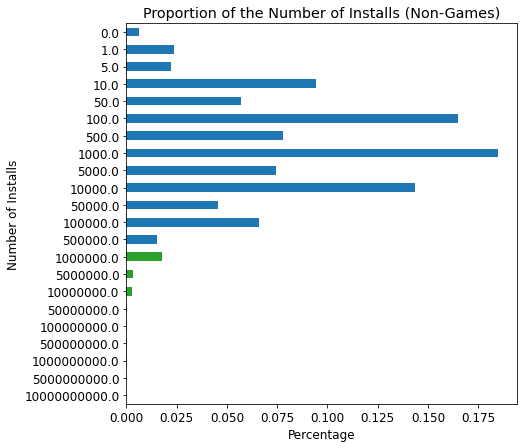

In [66]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (7, 7)})
plt.ylabel('Number of Installs')
plt.xlabel('Percentage')

plus_mill = ['tab:blue' if (x < 1000000.0) else 'tab:green' for x in df['Minimum Installs'].value_counts().sort_index().keys().tolist()]
df['Minimum Installs'].value_counts(normalize=True).sort_index().plot(kind="barh", 
                                                                      title='Proportion of the Number of Installs (Non-Games)', 
                                                                      color=plus_mill);
plt.gca().invert_yaxis()

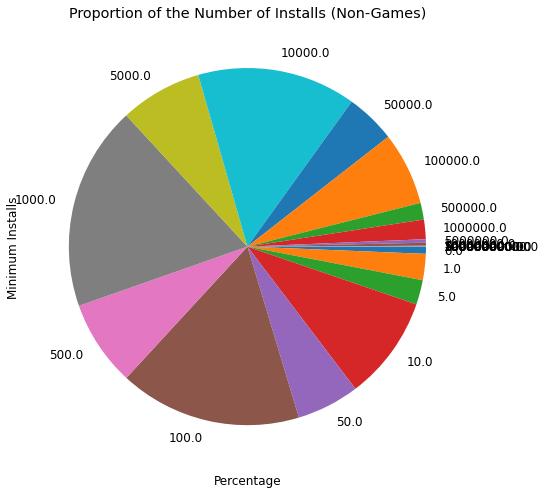

In [11]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (8, 9)})
plt.ylabel('Number of Installs')
plt.xlabel('Percentage')
plus_mill = ['tab:blue' if (x >= 10000) else 'green' for x in df['Minimum Installs'].value_counts()]
df['Minimum Installs'].value_counts().sort_index().plot(kind="pie", title='Proportion of the Number of Installs (Non-Games)');
plt.gca().invert_yaxis()

### Correlation with ratings and installation

<AxesSubplot:title={'center':'Error Features Correlation Matrix'}>

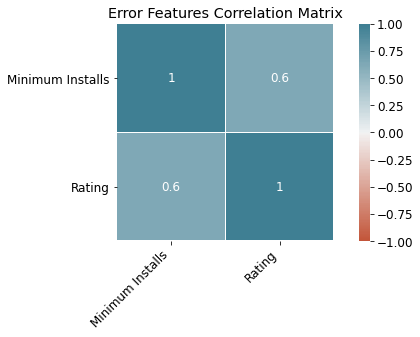

In [12]:
rating_installation = df[['Minimum Installs', 'Rating']]

corr = rating_installation.corr(method='spearman')

fig, ax = plt.subplots(figsize=(9, 4))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".1n",
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right',
);
plt.title("Error Features Correlation Matrix")
ax

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898709 entries, 0 to 1118135
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   App Name          898709 non-null  object        
 1   Category          898709 non-null  object        
 2   Rating            898709 non-null  float64       
 3   Rating Count      898709 non-null  float64       
 4   Installs          898709 non-null  object        
 5   Minimum Installs  898709 non-null  float64       
 6   Maximum Installs  898709 non-null  int64         
 7   Free              898709 non-null  bool          
 8   Minimum Android   898709 non-null  object        
 9   Developer Id      898709 non-null  object        
 10  Released          898709 non-null  datetime64[ns]
 11  Last Updated      898709 non-null  object        
 12  Content Rating    898709 non-null  object        
 13  Ad Supported      898709 non-null  bool          
 14  In 

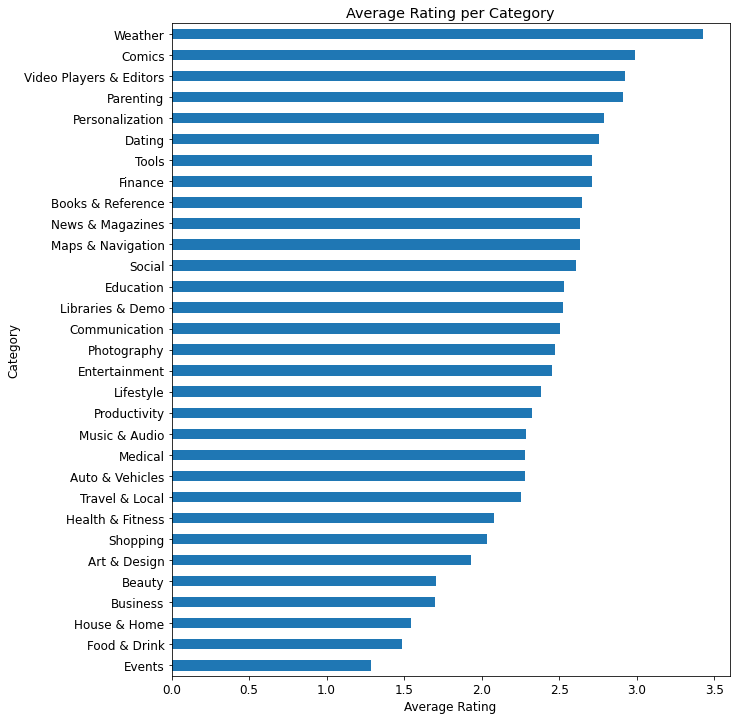

In [13]:
all_apps = df.groupby('Category')['Rating'].mean()

plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Average Rating')
all_apps.sort_values(ascending=False).plot(kind="barh", title='Average Rating per Category');
plt.gca().invert_yaxis()
print(df.info())

### Apps with over 1 million

In [14]:
million = df[df['Minimum Installs'] >= 1000000]

### App ratings (All apps)

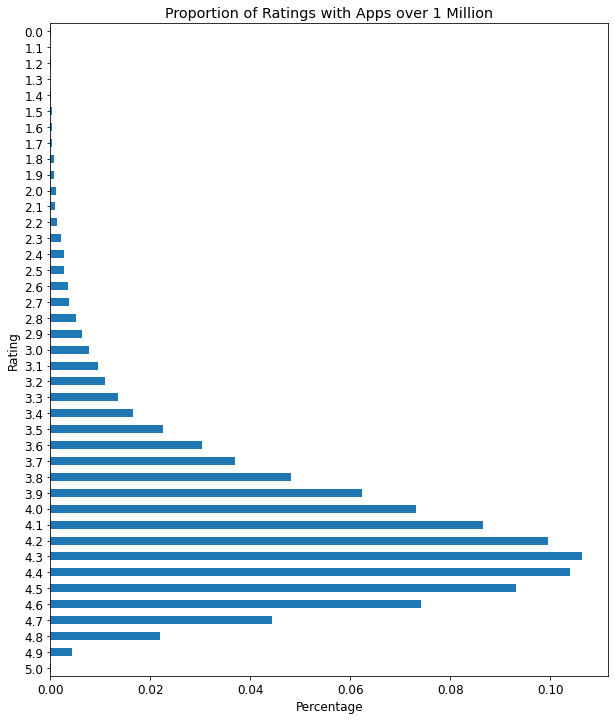

In [15]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Rating')
plt.xlabel('Percentage')
million['Rating'].value_counts(normalize=True).sort_index().plot(kind="barh", title='Proportion of Ratings with Apps over 1 Million');
plt.gca().invert_yaxis()

### Average rating per category (Over 1 million installs)

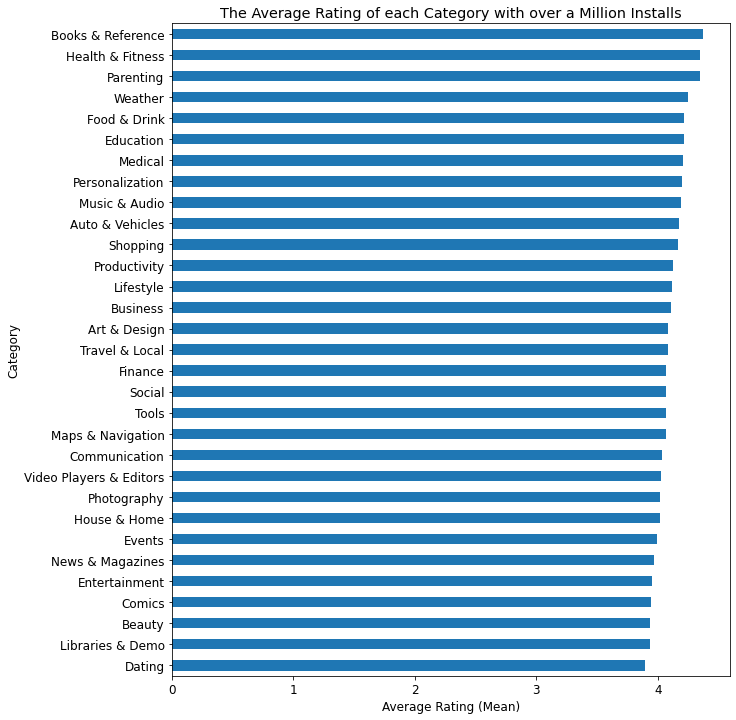

In [16]:
average = million.groupby('Category')['Rating'].mean()

plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Average Rating (Mean)')
average.sort_values(ascending=False).plot(kind="barh", title='The Average Rating of each Category with over a Million Installs');
plt.gca().invert_yaxis()

### Ratings over 4.0

In [17]:
pd.set_option("display.max.rows", 1020)

In [18]:
v_good_rating = million[(million['Rating'] >= 4.8) & (million['Rating'] <= 5.0)]
good_rating = million[million['Rating'] >= 4.0]
bad_rating = million[(million['Rating'] <= 2.2) & (million['Rating'] >= 0.1)]

#v_good_rating.sort_values(by=['Rating'], ascending=False)
#bad_rating.sort_values(by=['Rating'])

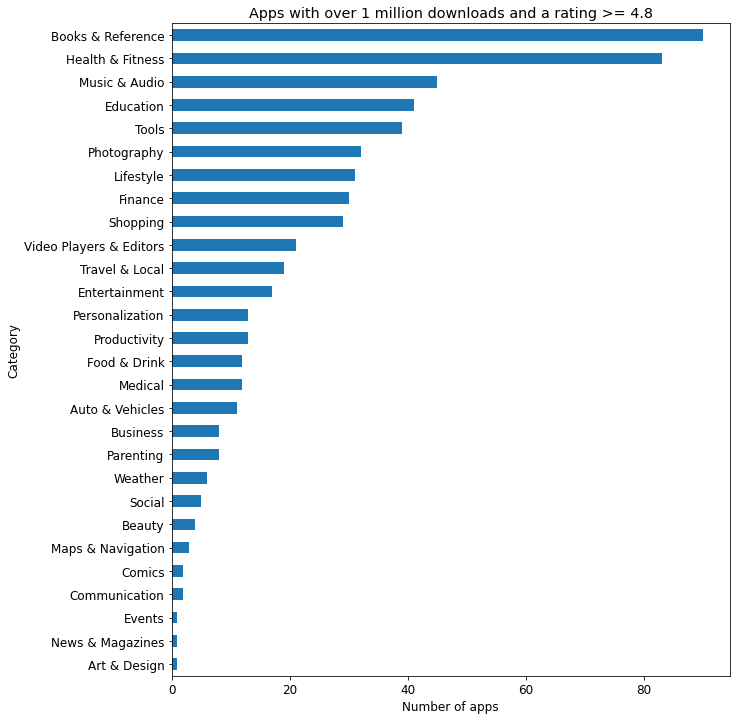

In [19]:
average = v_good_rating['Category'].value_counts()

plt.axes().set_facecolor("white")
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Number of apps')
average.sort_values(ascending=False).plot(kind="barh", title='Apps with over 1 million downloads and a rating >= 4.8');
plt.gca().invert_yaxis()

### Proportion of Categories

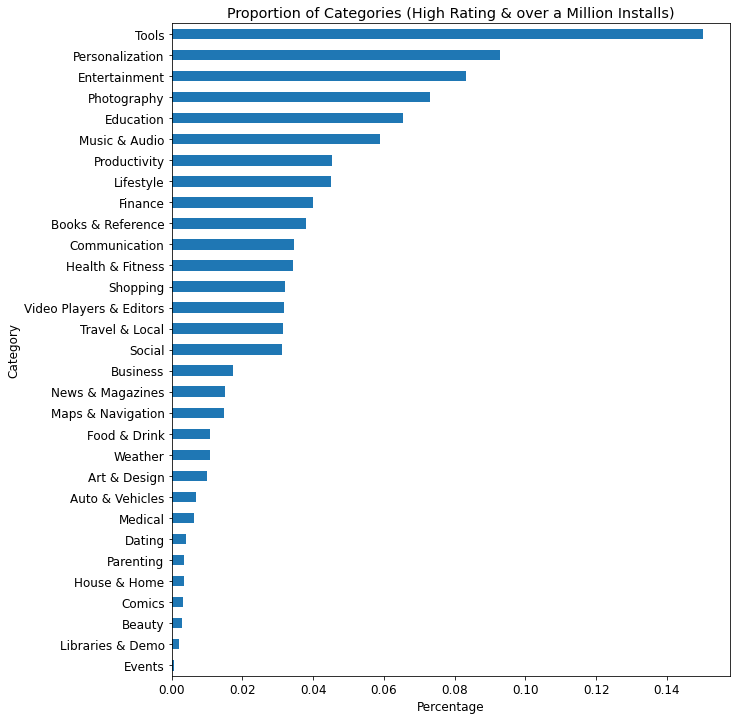

In [20]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Percentage')
good_rating['Category'].value_counts(normalize=True).plot(kind="barh", title='Proportion of Categories (High Rating & over a Million Installs)');
plt.gca().invert_yaxis()

### Average number of installs per category

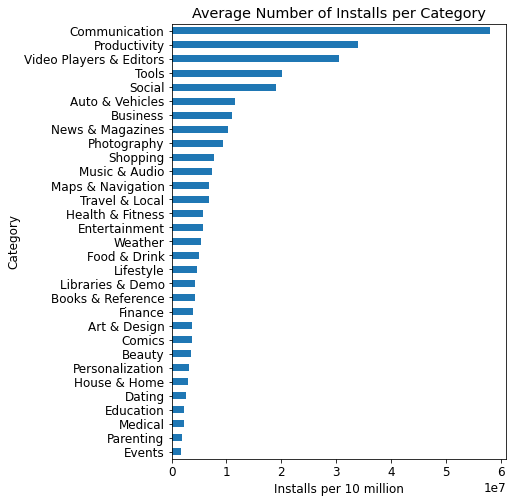

In [49]:
average_install = good_rating.groupby('Category')['Minimum Installs'].mean()
plt.axes().set_facecolor("white")
plt.rcParams.update({'font.size': 12, 'figure.figsize': (6, 8)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
#average_install.sort_index().plot(kind="barh", title='Average Number of Installs per Category');
average_install.sort_values().plot(kind="barh", title='Average Number of Installs per Category');
#plt.gca().invert_yaxis()
plt.savefig("Category Installs", facecolor="white", transparent=False, bbox_inches="tight")

### Average installs per age rating

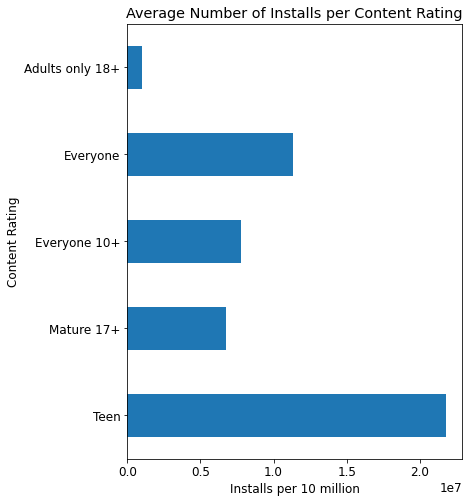

In [22]:
age_install = good_rating.groupby('Content Rating')['Minimum Installs'].mean()

plt.axes().set_facecolor("white")
plt.rcParams.update({'font.size': 12, 'figure.figsize': (3, 3)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
age_install.sort_index().plot(kind="barh", title='Average Number of Installs per Content Rating');
plt.gca().invert_yaxis()
plt.savefig("Age rating", transparent=False, bbox_inches="tight")

In [23]:
good_rating["Content Rating"].value_counts()

Everyone           12988
Teen                1568
Mature 17+           663
Everyone 10+         220
Adults only 18+        1
Name: Content Rating, dtype: int64

### Does editors choice matter?

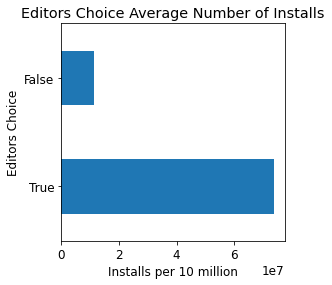

In [51]:
editor_install = good_rating.groupby('Editors Choice')['Minimum Installs'].mean()

plt.axes().set_facecolor("white")
plt.rcParams.update({'font.size': 12, 'figure.figsize': (4, 4)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
editor_install.sort_index().plot(kind="barh", title='Editors Choice Average Number of Installs');
plt.gca().invert_yaxis()
plt.savefig("Editors Choice", facecolor="white", transparent=False, bbox_inches="tight")

In [25]:
good_rating["Editors Choice"].value_counts()

False    15211
True       229
Name: Editors Choice, dtype: int64

In [26]:
ad_install = good_rating.groupby('Ad Supported')['Minimum Installs'].mean()
in_app_install = good_rating.groupby('In App Purchases')['Minimum Installs'].mean()

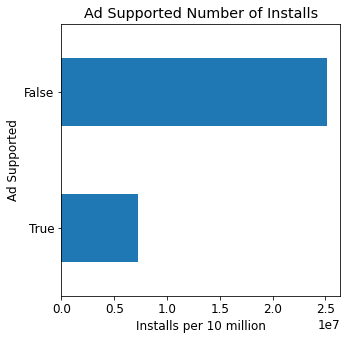

In [27]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
ad_install.sort_index().plot(kind="barh", title='Ad Supported Number of Installs');
plt.gca().invert_yaxis()

In [28]:
good_rating["Ad Supported"].value_counts()

True     11202
False     4238
Name: Ad Supported, dtype: int64

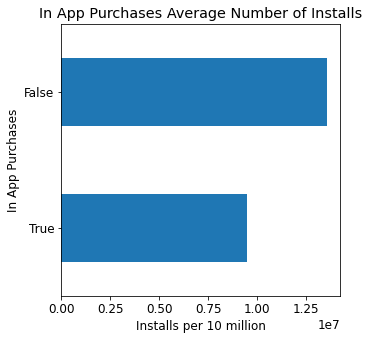

In [29]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
in_app_install.sort_index().plot(kind="barh", title='In App Purchases Average Number of Installs');
plt.gca().invert_yaxis()

In [30]:
good_rating["In App Purchases"].value_counts()

False    10069
True      5371
Name: In App Purchases, dtype: int64

### Editors Choice apps

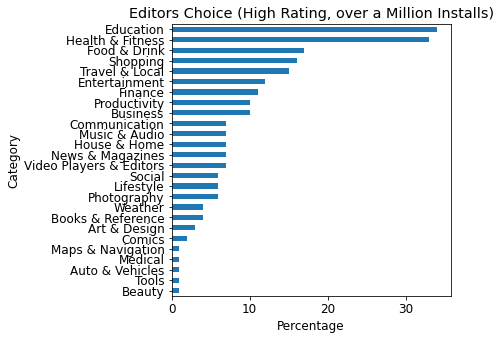

In [31]:
app_editors = good_rating[good_rating['Editors Choice'] != False]
plt.axes().set_facecolor("white")
plt.rcParams.update({'font.size': 12, 'figure.figsize': (6, 10)})
plt.ylabel('Category')
plt.xlabel('Percentage')
app_editors['Category'].value_counts().plot(kind="barh", title='Editors Choice (High Rating, over a Million Installs)');
plt.gca().invert_yaxis()

## List of apps

### Health apps with editors choice

In [32]:
health_apps = app_editors[app_editors['Category'] == 'Health & Fitness'] 

health_apps.head(33)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1641,Yoga | Down Dog,Health & Fitness,4.9,126436.0,"1,000,000+",1000000.0,4329163,True,4.2 and up,Yoga Buddhi Co.,2016-02-29,"Nov 25, 2020",Teen,False,True,True
6462,Seven - 7 Minute Workout,Health & Fitness,4.4,88050.0,"5,000,000+",5000000.0,5245189,True,5.0 and up,Perigee AB,2014-04-18,"Nov 03, 2020",Everyone,False,True,True
6463,Mindbody: Home Workout & Fitness App,Health & Fitness,4.5,14365.0,"1,000,000+",1000000.0,4105799,True,4.4 and up,MINDBODY Inc,2013-10-04,"Nov 25, 2020",Everyone,False,False,True
65161,Home Workout - No Equipment,Health & Fitness,4.9,1440491.0,"100,000,000+",100000000.0,120450947,True,4.4 and up,Leap Fitness Group,2017-11-08,"Sep 22, 2020",Everyone,True,True,True
65162,Six Pack in 30 Days - Abs Workout,Health & Fitness,4.9,1114315.0,"50,000,000+",50000000.0,88014944,True,5.0 and up,Leap Fitness Group,2018-01-09,"Oct 12, 2020",Teen,True,True,True
67282,adidas Running App by Runtastic - Run Tracker,Health & Fitness,4.6,1049522.0,"50,000,000+",50000000.0,60973190,True,Varies with device,Runtastic,2010-05-12,"Nov 23, 2020",Everyone,True,True,True
82635,Freeletics Training Coach – Bodyweight & Mindset,Health & Fitness,4.2,193922.0,"10,000,000+",10000000.0,27445207,True,6.0 and up,Freeletics,2014-01-02,"Nov 16, 2020",Everyone,True,True,True
115703,SnoreLab : Record Your Snoring,Health & Fitness,4.2,30012.0,"1,000,000+",1000000.0,3795922,True,5.0 and up,Reviva Softworks Ltd,2015-09-21,"Nov 24, 2020",Everyone,True,True,True
135004,Asana Rebel: Get in Shape,Health & Fitness,4.2,24819.0,"5,000,000+",5000000.0,5657462,True,5.0 and up,Asana Rebel,2016-10-19,"Oct 27, 2020",Everyone,False,True,True
150647,"Komoot — Cycling, Hiking & Mountain Biking Maps",Health & Fitness,4.6,170308.0,"5,000,000+",5000000.0,8893042,True,5.0 and up,komoot GmbH,2014-06-10,"Nov 23, 2020",Everyone,False,True,True


### Productive apps with editors choice

In [33]:
productive_apps = app_editors[app_editors['Category'] == 'Productivity']
productive_apps.head(20)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1622,Forest: Stay focused,Productivity,4.4,271046.0,"10,000,000+",10000000.0,17424312,True,4.4 and up,Seekrtech,2014-08-25,"Nov 23, 2020",Everyone,True,True,True
93574,Mobizen Screen Recorder,Productivity,4.2,2939434.0,"100,000,000+",100000000.0,153405591,True,4.4 and up,MOBIZEN,2012-05-09,"Oct 30, 2020",Everyone,True,True,True
166785,"TickTick: ToDo List Planner, Reminder & Calendar",Productivity,4.6,69239.0,"1,000,000+",1000000.0,3046261,True,Varies with device,Appest Inc.,2013-06-19,"Nov 25, 2020",Everyone,False,True,True
204060,"NOTEBOOK - Take Notes, Sync",Productivity,4.4,31980.0,"1,000,000+",1000000.0,2195162,True,5.0 and up,Zoho Corporation,2016-05-22,"Nov 18, 2020",Everyone,False,False,True
206907,DigiCal Calendar Agenda,Productivity,4.4,162716.0,"5,000,000+",5000000.0,8576797,True,4.4 and up,Digibites,2012-09-26,"Feb 17, 2020",Everyone,True,True,True
217833,"Todoist: To-Do List, Tasks & Reminders",Productivity,4.5,212811.0,"10,000,000+",10000000.0,30457973,True,Varies with device,Doist,2012-11-18,"Nov 17, 2020",Everyone,False,True,True
217836,"Trello: Organize anything with anyone, anywhere!",Productivity,4.4,97625.0,"10,000,000+",10000000.0,14416982,True,Varies with device,"Trello, Inc.",2012-08-08,"Nov 18, 2020",Everyone,False,False,True
220501,SwiftScan - PDF Document Scanner,Productivity,4.5,48603.0,"1,000,000+",1000000.0,4597812,True,5.0 and up,"Document Scanner App - PDF, OCR, QR & Cloud Sync",2014-04-10,"Nov 23, 2020",Everyone,False,True,True
220949,CamScanner - Scanner to scan PDF,Productivity,4.5,3107253.0,"100,000,000+",100000000.0,239706299,True,Varies with device,"INTSIG Information Co.,Ltd",2010-10-30,"Nov 23, 2020",Everyone,True,True,True
222188,Microsoft OneNote: Save Ideas and Organize Notes,Productivity,4.3,816607.0,"500,000,000+",500000000.0,691327509,True,5.0 and up,Microsoft Corporation,2012-02-07,"Nov 29, 2020",Everyone,False,False,True


### Lifestyle apps with editors choice

In [34]:
lifestyle_apps = app_editors[app_editors['Category'] == 'Lifestyle']
lifestyle_apps.head(6)


,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1658,Sleep as Android 💤 Sleep cycle smart alarm,Lifestyle,4.5,326013.0,"10,000,000+",10000000.0,20426408,True,Varies with device,Urbandroid (Petr Nálevka),2010-10-24,"Oct 09, 2020",Everyone,True,True,True
66794,Life360: Family Locator & GPS Tracker for Safety,Lifestyle,4.4,1267804.0,"50,000,000+",50000000.0,81497874,True,6.0 and up,Life360,2010-04-07,"Nov 14, 2020",Everyone,False,True,True
175130,Easy Drawing: How to draw Step by Step,Lifestyle,4.3,72183.0,"10,000,000+",10000000.0,13681355,True,4.4 and up,Better Life - Color and Draw,2017-08-04,"Nov 27, 2020",Everyone,True,True,True
201729,"Journey: Diary, Journal",Lifestyle,4.5,80295.0,"1,000,000+",1000000.0,3143866,True,Varies with device,Two App Studio Pte. Ltd.,2014-07-27,"Oct 26, 2020",Everyone,False,True,True
201730,"Daylio - Diary, Journal, Mood Tracker",Lifestyle,4.6,308748.0,"10,000,000+",10000000.0,10759555,True,5.0 and up,Habitics,2015-08-17,"Nov 13, 2020",Everyone,True,True,True
220902,Pinterest,Lifestyle,4.6,7229303.0,"500,000,000+",500000000.0,529989174,True,Varies with device,Pinterest,2012-08-14,"Nov 21, 2020",Teen,True,False,True


### Health apps with teen rating

In [35]:
health_teen = good_rating[good_rating['Category'] == 'Health & Fitness']
health_teen = health_teen[health_teen['Content Rating'] == 'Teen']

health_teen.head(100)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
605,"Remente: Self Help, Mental Health & Improvement",Health & Fitness,4.2,10270.0,"1,000,000+",1000000.0,1050179,True,5.0 and up,Remente,2015-02-11,"Oct 13, 2020",Teen,False,True,False
1641,Yoga | Down Dog,Health & Fitness,4.9,126436.0,"1,000,000+",1000000.0,4329163,True,4.2 and up,Yoga Buddhi Co.,2016-02-29,"Nov 25, 2020",Teen,False,True,True
21419,Weight Loss Juice Recipes Belly Fat Burning Drink,Health & Fitness,4.1,3188.0,"1,000,000+",1000000.0,3465192,True,4.1 and up,Gaba Studio Apps,2016-12-19,"Nov 25, 2020",Teen,True,False,False
47772,Calorie Count,Health & Fitness,4.6,9925.0,"1,000,000+",1000000.0,1731769,True,4.1 and up,Bolshakov Aleksandr,2014-02-26,"Nov 20, 2020",Teen,True,True,False
65162,Six Pack in 30 Days - Abs Workout,Health & Fitness,4.9,1114315.0,"50,000,000+",50000000.0,88014944,True,5.0 and up,Leap Fitness Group,2018-01-09,"Oct 12, 2020",Teen,True,True,True
67422,"Buttocks Workout - Hips, Butt Workout",Health & Fitness,4.6,10418.0,"1,000,000+",1000000.0,2266326,True,4.4 and up,Leap Fitness Group,2018-09-07,"Dec 30, 2019",Teen,True,True,False
81255,BodBot Personal Trainer: Workout & Fitness Coach,Health & Fitness,4.5,26771.0,"1,000,000+",1000000.0,4387213,True,6.0 and up,BodBot,2016-11-16,"Nov 20, 2020",Teen,False,True,False
83407,"Relive: Run, Ride, Hike & more",Health & Fitness,4.7,177408.0,"5,000,000+",5000000.0,6170745,True,5.0 and up,Relive B.V.,2017-03-21,"Nov 27, 2020",Teen,False,True,False
104517,Burn Your Fat With Me! FG,Health & Fitness,4.5,42135.0,"1,000,000+",1000000.0,1342895,True,4.1 and up,株式会社 Creative Freaks,2013-09-05,"Jun 25, 2020",Teen,True,True,False
148128,"Body Editor - Body Shape Editor, Slim Face & Body",Health & Fitness,4.6,93786.0,"10,000,000+",10000000.0,23995610,True,4.3 and up,InShot Video & Photo Apps,2017-12-07,"Apr 07, 2020",Teen,True,True,False


### Productivity apps with teen rating

In [36]:
productive_teen = good_rating[good_rating['Category'] == 'Productivity']
productive_teen = productive_teen[productive_teen['Content Rating'] == 'Teen']

productive_teen.head(100)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
106558,Aparat,Productivity,4.4,31717.0,"1,000,000+",1000000.0,3647446,True,4.2 and up,SabaIdea,2017-12-22,"Jan 20, 2020",Teen,True,False,False
110422,Best Flashlight,Productivity,4.3,89432.0,"10,000,000+",10000000.0,12701887,True,4.1 and up,Zentertain,2013-09-30,"Feb 17, 2020",Teen,True,False,False
125801,Hamro Patro : The Best Nepali Patro 🇳🇵,Productivity,4.4,89136.0,"5,000,000+",5000000.0,9261754,True,5.0 and up,Hamro Patro,2012-01-22,"Nov 03, 2020",Teen,True,True,False
137839,Lightning QR Code Scanner: QR & Barcode Reader,Productivity,4.6,12278.0,"1,000,000+",1000000.0,2532070,True,4.4 and up,Apps Wing,2019-02-05,"Mar 16, 2020",Teen,True,True,False
142938,Status Saver - Downloader for Whatsapp,Productivity,4.5,327274.0,"50,000,000+",50000000.0,71615301,True,4.1 and up,Shree Ganesha Labs,2017-02-28,"Nov 07, 2020",Teen,True,True,False
147637,"Social Post Maker for Facebook, Instagram & More",Productivity,4.6,12390.0,"1,000,000+",1000000.0,1454634,True,5.0 and up,Desygner Pty Ltd,2018-04-03,"Oct 29, 2020",Teen,True,True,False
164094,Flashlight: LED Light,Productivity,4.3,144358.0,"10,000,000+",10000000.0,22824017,True,4.1 and up,Zentertain,2014-06-16,"Feb 17, 2020",Teen,True,False,False
294212,Quick Settings free,Productivity,4.3,8512.0,"1,000,000+",1000000.0,2598639,True,2.3 and up,Adcoms,2013-06-16,"Oct 25, 2018",Teen,True,False,False
294214,free monthly calendar app,Productivity,4.1,3796.0,"1,000,000+",1000000.0,1662961,True,2.3 and up,Adcoms,2013-12-12,"Sep 22, 2018",Teen,True,False,False
349898,Great Quotes by Great Legends,Productivity,4.4,2139.0,"1,000,000+",1000000.0,1259684,True,4.1 and up,Tech Geekz Apps,2017-11-22,"Nov 23, 2020",Teen,True,False,False


### Lifestyle apps with teen rating

In [37]:
lifestyle_teen = good_rating[good_rating['Category'] == 'Lifestyle']
lifestyle_teen = lifestyle_teen[lifestyle_teen['Content Rating'] == 'Teen']

lifestyle_teen.head(150)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
10052,UNiDAYS: Student Deals,Lifestyle,4.1,8948.0,"1,000,000+",1000000.0,2610462,True,6.0 and up,UNiDAYS,2015-02-10,"Nov 25, 2020",Teen,False,False,False
10581,Angry Crocodile Simulator: Crocodile Attack,Lifestyle,4.6,1644.0,"1,000,000+",1000000.0,1383138,True,4.1 and up,GamePark,2020-03-14,"Oct 09, 2020",Teen,True,True,False
21704,FPS Anti Terrorist Shooter Mission: Shooting G...,Lifestyle,4.3,8246.0,"5,000,000+",5000000.0,7218758,True,5.0 and up,Newry,2019-05-31,"Nov 25, 2020",Teen,True,True,False
21705,Police Robot Bus Transformation Car Game,Lifestyle,4.1,2030.0,"1,000,000+",1000000.0,1358708,True,5.1 and up,Crystal Studio Games,2019-10-15,"Nov 16, 2020",Teen,True,True,False
21726,Wild Dinosaur Hunter Simulator:Free Shooting G...,Lifestyle,4.3,2067.0,"1,000,000+",1000000.0,1017813,True,4.1 and up,Crystal Studio Games,2019-10-09,"Jul 21, 2020",Teen,True,True,False
21740,Combat Strike 2020: FPS War- Online shooter & PVP,Lifestyle,4.1,22202.0,"5,000,000+",5000000.0,8738405,True,4.1 and up,Gakmob LTD,2018-11-22,"Aug 14, 2020",Teen,True,True,False
21892,Counter Terrorist Shooting Strike-Commando Mis...,Lifestyle,4.0,2773.0,"1,000,000+",1000000.0,2803692,True,4.1 and up,Warrior Zone,2019-06-06,"Nov 05, 2020",Teen,True,True,False
27993,Lucky Money - Feel Great & Make it Rain,Lifestyle,4.4,504675.0,"10,000,000+",10000000.0,15449800,True,5.0 and up,Shape Keeper Ltd,2019-07-11,"Nov 19, 2020",Teen,True,False,False
42147,Farm Animal Truck Transport Simulator,Lifestyle,4.8,1239.0,"1,000,000+",1000000.0,1290956,True,4.1 and up,Game pace,2019-04-07,"Jul 17, 2020",Teen,True,False,False
43735,Couple Widget - Love Events Countdown Widget,Lifestyle,4.6,9106.0,"1,000,000+",1000000.0,1103700,True,4.2 and up,PRINC,2019-02-20,"Aug 14, 2020",Teen,True,False,False


### Latest Apps

In [38]:
#good_rating.sort_values(by=['Released'], ascending=False)

recent_apps = good_rating[(good_rating['Released'] > '2020-10-01') & (good_rating['Released'] < '2020-12-31')]
recent_apps.info()
recent_apps.sort_values(by=['Released'], ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 55955 to 1091744
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   App Name          13 non-null     object        
 1   Category          13 non-null     object        
 2   Rating            13 non-null     float64       
 3   Rating Count      13 non-null     float64       
 4   Installs          13 non-null     object        
 5   Minimum Installs  13 non-null     float64       
 6   Maximum Installs  13 non-null     int64         
 7   Free              13 non-null     bool          
 8   Minimum Android   13 non-null     object        
 9   Developer Id      13 non-null     object        
 10  Released          13 non-null     datetime64[ns]
 11  Last Updated      13 non-null     object        
 12  Content Rating    13 non-null     object        
 13  Ad Supported      13 non-null     bool          
 14  In App Purchases  1

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
215836,Next: Shop Fashion & Homeware,Shopping,4.1,16991.0,"1,000,000+",1000000.0,2223665,True,5.0 and up,Next Plc,2020-11-24,"Nov 24, 2020",Mature 17+,False,False,False
1091744,Ujjivan Mobile Banking,Finance,4.5,19605.0,"1,000,000+",1000000.0,1057919,True,4.4 and up,Ujjivan Small Finance Bank Limited,2020-11-23,"Oct 15, 2020",Everyone,False,False,False
174084,Coco-melon Nursery Rhymes and Kid Songs,Education,4.1,2146.0,"1,000,000+",1000000.0,1218452,True,4.3 and up,TDT2020,2020-11-10,"Nov 18, 2020",Everyone,True,False,False
222507,Moj - Made in India | Short Video App,Social,4.3,292919.0,"50,000,000+",50000000.0,80048931,True,4.1 and up,ShareChat,2020-11-08,"Nov 25, 2020",Teen,False,False,False
567379,Black Friday Promobit: Ofertas Promoções Desco...,Shopping,4.7,31697.0,"1,000,000+",1000000.0,1023321,True,5.0 and up,"Ofertas, Promoções e Descontos das Melhores Lo...",2020-11-05,"Nov 16, 2020",Everyone,False,False,False
132617,Mi Calendar,Productivity,4.3,4853.0,"50,000,000+",50000000.0,72374699,True,5.0 and up,Xiaomi Inc.,2020-11-03,"Jul 15, 2020",Everyone,False,False,False
136280,IKEA,Shopping,4.4,50642.0,"5,000,000+",5000000.0,5781427,True,7.0 and up,Inter IKEA Systems B.V.,2020-10-24,"Nov 23, 2020",Everyone,False,False,False
734892,Мой Дом.ru,Communication,4.3,9139.0,"1,000,000+",1000000.0,1586011,True,4.4 and up,ЭР-Телеком Холдинг,2020-10-21,"Nov 19, 2020",Everyone,False,False,False
673082,Maps Among us for Minecraft,Entertainment,4.2,46559.0,"1,000,000+",1000000.0,2508202,True,4.1 and up,Super Effects,2020-10-14,"Oct 19, 2020",Everyone,True,True,False
827222,Préstamos efectivo Crédito seguro y rápido,Finance,4.4,36277.0,"1,000,000+",1000000.0,1170084,True,4.4 and up,Paay Préstamos Personales,2020-10-14,"Nov 06, 2020",Everyone,False,False,False


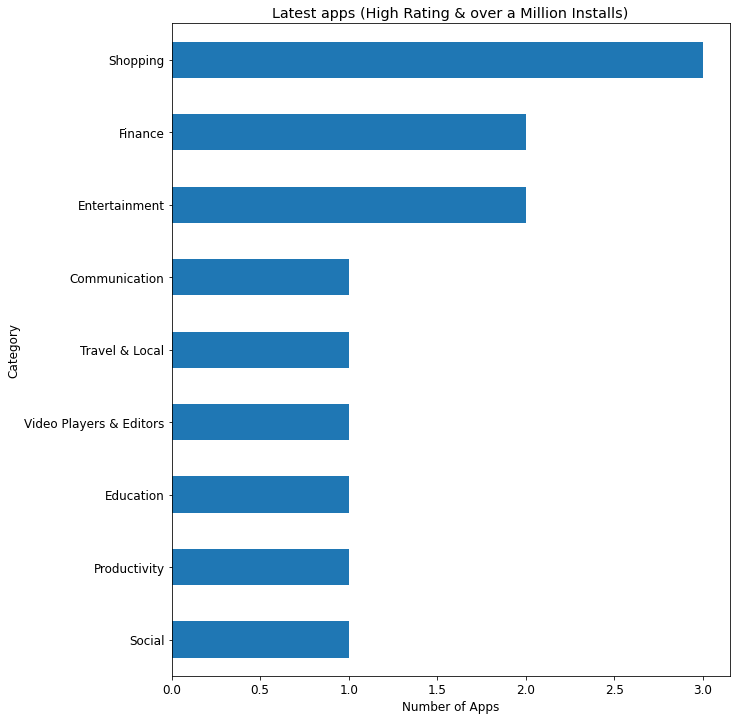

In [39]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Number of Apps')
recent_apps['Category'].value_counts().plot(kind="barh", title='Latest apps (High Rating & over a Million Installs)');
plt.gca().invert_yaxis()

In [40]:
recent_apps2 = million[(million['Released'] > '2020-10-01') & (million['Released'] < '2020-12-31')]
recent_apps2.sort_values(by=['Released'], ascending=False)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1106080,Sorun Kalmasın - YKS TYT AYT KPSS DGS,Education,3.6,9889.0,"1,000,000+",1000000.0,1019379,True,4.4 and up,Sorun Kalmasın,2020-12-01,"Dec 01, 2020",Everyone,True,False,False
215836,Next: Shop Fashion & Homeware,Shopping,4.1,16991.0,"1,000,000+",1000000.0,2223665,True,5.0 and up,Next Plc,2020-11-24,"Nov 24, 2020",Mature 17+,False,False,False
1091744,Ujjivan Mobile Banking,Finance,4.5,19605.0,"1,000,000+",1000000.0,1057919,True,4.4 and up,Ujjivan Small Finance Bank Limited,2020-11-23,"Oct 15, 2020",Everyone,False,False,False
142910,Mi Claro,Shopping,2.2,9437.0,"10,000,000+",10000000.0,11854698,True,5.0 and up,Claro Centroamérica,2020-11-18,"Nov 19, 2020",Everyone,False,False,False
740812,Mi Claro,Tools,2.2,6533.0,"1,000,000+",1000000.0,1235088,True,5.0 and up,Claro Chile,2020-11-18,"Nov 25, 2020",Everyone,False,False,False
174084,Coco-melon Nursery Rhymes and Kid Songs,Education,4.1,2146.0,"1,000,000+",1000000.0,1218452,True,4.3 and up,TDT2020,2020-11-10,"Nov 18, 2020",Everyone,True,False,False
222507,Moj - Made in India | Short Video App,Social,4.3,292919.0,"50,000,000+",50000000.0,80048931,True,4.1 and up,ShareChat,2020-11-08,"Nov 25, 2020",Teen,False,False,False
567379,Black Friday Promobit: Ofertas Promoções Desco...,Shopping,4.7,31697.0,"1,000,000+",1000000.0,1023321,True,5.0 and up,"Ofertas, Promoções e Descontos das Melhores Lo...",2020-11-05,"Nov 16, 2020",Everyone,False,False,False
132617,Mi Calendar,Productivity,4.3,4853.0,"50,000,000+",50000000.0,72374699,True,5.0 and up,Xiaomi Inc.,2020-11-03,"Jul 15, 2020",Everyone,False,False,False
103843,LEGO® 3D Catalogue,Entertainment,3.5,26698.0,"1,000,000+",1000000.0,3373120,True,4.4 and up,LEGO System A/S,2020-10-27,"Oct 28, 2020",Everyone,False,False,False


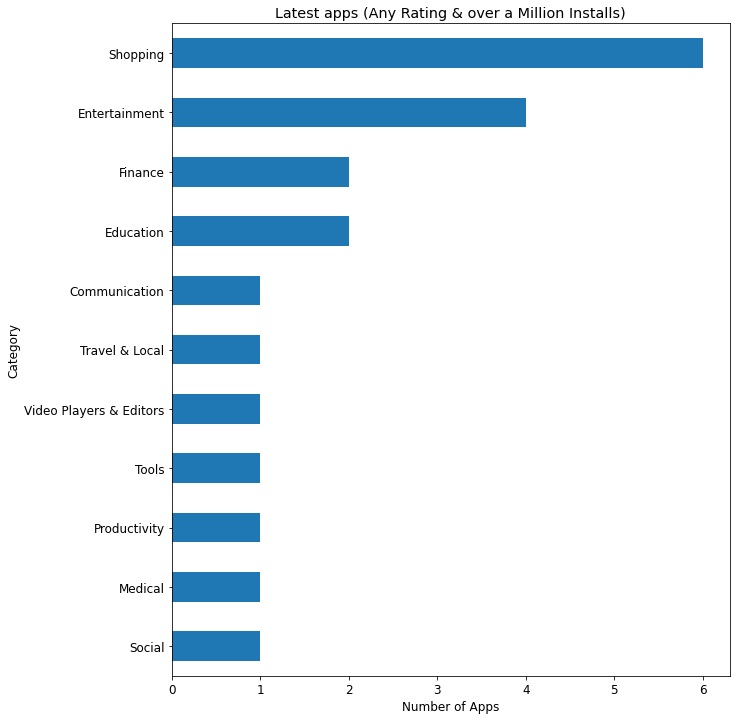

In [41]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Number of Apps')
recent_apps2['Category'].value_counts().plot(kind="barh", title='Latest apps (Any Rating & over a Million Installs)');
plt.gca().invert_yaxis()

In [42]:
daylio = df[df['App Name'] == 'eMoods Bipolar Mood Tracker']
daylio.head()

#productive_apps = app_editors[app_editors['Category'] == 'Productivity']

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
212774,eMoods Bipolar Mood Tracker,Health & Fitness,4.5,4210.0,"100,000+",100000.0,335959,True,Varies with device,eMoods,2010-10-11,"Nov 23, 2020",Everyone,False,True,False
